# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

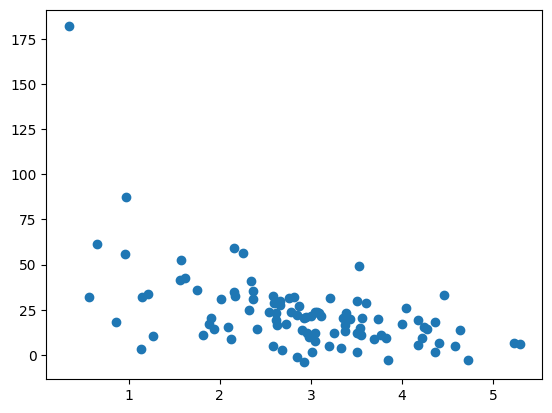

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [2]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

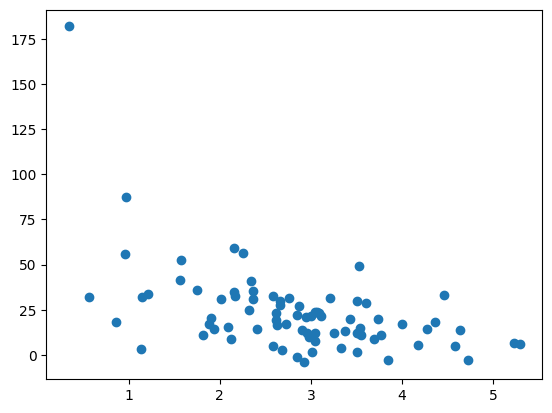

In [3]:
scatter(trainX, trainY)

And our test dataset:

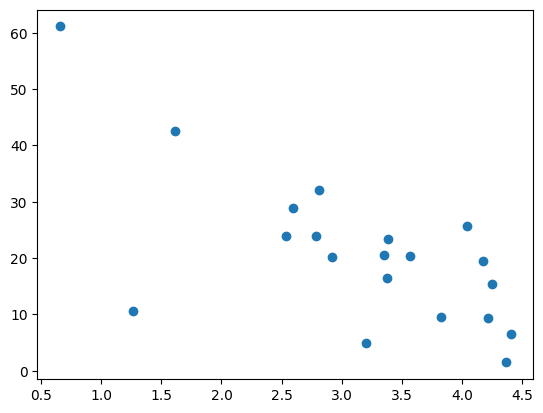

In [4]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [5]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

Let's plot our polynomial against the training data:

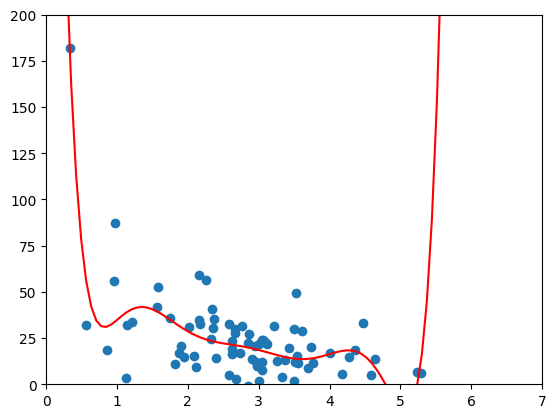

In [6]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


And against our test data:

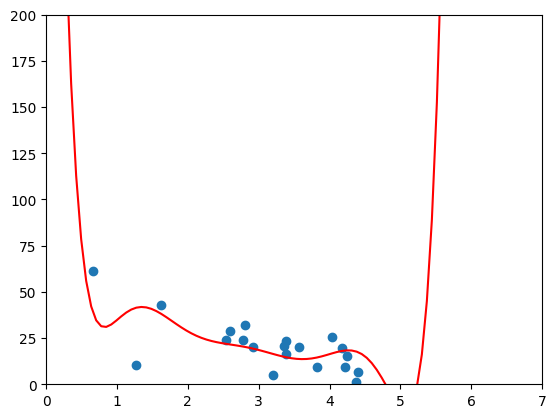

In [7]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)

0.30018168610213725


...even though it fits the training data better:

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.642706951469121


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

So we are going to run a for loop to fit different polynomials with different degree and save the R2 score in the training and test data to compare the values and select the best model.

In [32]:
degrees = []
train_scores = []
test_scores = []

for i in range(1,20):
    p4 = np.poly1d(np.polyfit(x, y, i))
    r2_train = r2_score(np.array(trainY), p4(np.array(trainX)))
    r2_test = r2_score(testy, p4(testx))
    degrees.append(i)
    train_scores.append(r2_train)
    test_scores.append(r2_test)
    print('Pol degree {}:  Train Score: {:.2f} and Test Score {:.2f}'.format(i, r2_train, r2_test))
    

Pol degree 1:  Train Score: 0.26 and Test Score 0.42
Pol degree 2:  Train Score: 0.36 and Test Score 0.29
Pol degree 3:  Train Score: 0.43 and Test Score 0.27
Pol degree 4:  Train Score: 0.48 and Test Score 0.39
Pol degree 5:  Train Score: 0.55 and Test Score 0.50
Pol degree 6:  Train Score: 0.60 and Test Score 0.61
Pol degree 7:  Train Score: 0.62 and Test Score 0.55
Pol degree 8:  Train Score: 0.64 and Test Score 0.30
Pol degree 9:  Train Score: 0.66 and Test Score 0.22
Pol degree 10:  Train Score: 0.68 and Test Score 0.22
Pol degree 11:  Train Score: 0.69 and Test Score 0.27
Pol degree 12:  Train Score: 0.69 and Test Score 0.06
Pol degree 13:  Train Score: 0.71 and Test Score 0.23
Pol degree 14:  Train Score: 0.71 and Test Score 0.29
Pol degree 15:  Train Score: 0.71 and Test Score 0.13
Pol degree 16:  Train Score: 0.74 and Test Score -3.75
Pol degree 17:  Train Score: 0.79 and Test Score -19.87
Pol degree 18:  Train Score: 0.78 and Test Score -15.06
Pol degree 19:  Train Score: 0.7

C:\Users\alero\.conda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\alero\.conda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


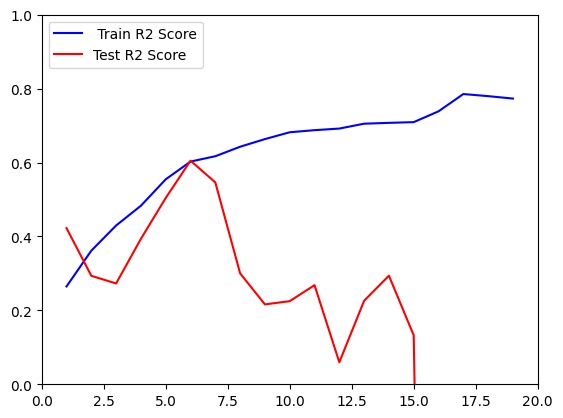

In [45]:
degrees = np.array(degrees)
Y_train = np.array(train_scores)
Y_test = np.array(test_scores)

axes = plt.axes()
axes.set_xlim([0,20]) 
axes.set_ylim([0, 1]) # Values of R-squared range from 0 to 1
#plt.scatter(X_axe, Y_axe)
plt.plot(degrees, Y_train, c='b', label=' Train R2 Score')
plt.plot(degrees, Y_test, c='r', label='Test R2 Score')
plt.legend(loc="upper left")
plt.show()

As we can see the highest value is at degree 6 where the R2 is similar for both training and testing data with a value of 0.60 and 0.61 respectively.

In [38]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 6))

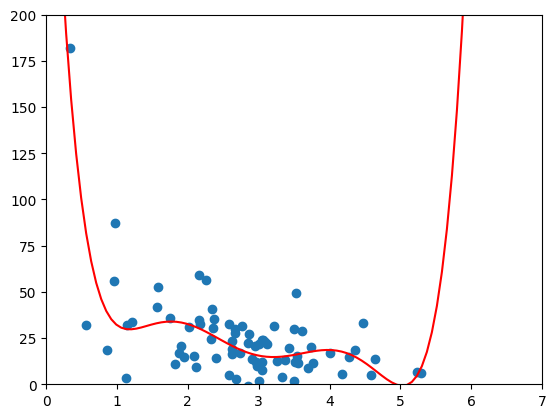

In [39]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

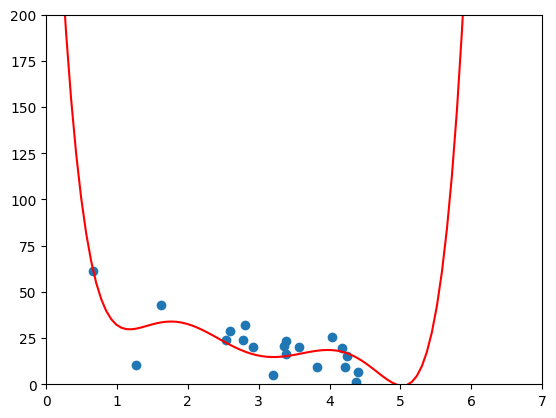

In [40]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Training R2 score:

In [42]:
r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.602544170711051


Test R2 score:

In [43]:
r2 = r2_score(testy, p4(testx))

print(r2)

0.6050119470356294


# Concepts applied in this notebook:

- **Train/Test Datasets:** In machine learning, datasets are split into two main parts: the training dataset and the testing dataset. The **training dataset** is used to train, or fit, the model. It includes both the input data and the corresponding expected output. The model learns to make predictions by adjusting its parameters to minimize errors during this training phase. The **testing dataset**, on the other hand, is a separate set of data not seen by the model during training. It is used to evaluate the performance of the model, to test how well the model can predict new, unseen data. This separation helps in assessing the model's generalization capability, i.e., its ability to perform on data it hasn't seen before.  
  
  
- **Polynomial Regression:** Polynomial regression is a form of regression analysis in which the relationship between the independent variable \(x\) and the dependent variable \(y\) is modeled as an \(n\)th degree polynomial. Polynomial regression fits a nonlinear relationship between the value of \(x\) and the corresponding conditional mean of \(y\), denoted \(E(y|x)\), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics. Unlike linear regression which models the relationship with a straight line, polynomial regression models it with a curve, making it better suited for datasets with non-linear trends.  

  
- **Overfitting:** Overfitting is a common problem in machine learning, where a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the model is too complex, with too many parameters relative to the number of observations. Overfitted models have a low bias but a high variance. They perform very well on the training data but poorly on any unseen data (test data or real-world data) because they've essentially memorized the training data rather than learned the underlying trends.  

  
- **R-squared Score:** The R-squared score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides an indication of the goodness of fit of a set of predictions to the actual values, in the context of linear regression models. An R-squared score of 1 indicates that the regression predictions perfectly fit the data. Values of R-squared range from 0 to 1, where 0 indicates that the model explains none of the variability of the response data around its mean, and 1 indicates that it explains all the variability of the response data around its mean.  
A **negative R-squared value** can occur when the chosen model fits the data worse than a horizontal line representing the mean of the dependent variable. This situation implies that the model's predictions are more erroneous than simply using the mean of the dependent variable as a predictor. This can happen with certain types of models or in situations where the assumptions of linear regression are violated, and the model is trying to capture complex relationships that it is not suited for, leading to a poor fit.  
In other words, a negative R-squared value indicates that the predictive model is performing worse than a simple model that predicts the mean of the dependent variable, disregarding any input features. It's a strong indication that the model needs reevaluation, either by selecting a different model, incorporating more relevant features, or transforming the existing features to better capture the relationship between the variables.


